In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const

## Background readings
* Coarse gain: x10
* Fine gain: just under 12.5
* Integrate: 200 ns
* Diff: 500 ns

In [2]:
bin_arr = []
energy_arr = []

Text(0.5, 1.0, 'Background')

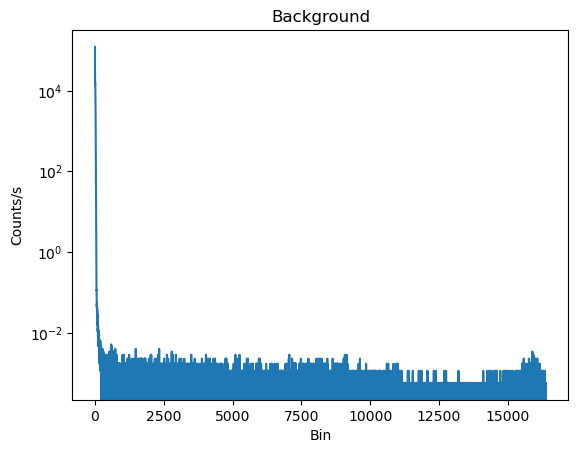

In [3]:
filepath = 'data/background_x10.csv'
duration = 1763  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

bg_ch = df['ch']  # bin
bg_n = df['n'] / duration  # counts/s

plt.plot(bg_ch, bg_n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Background')

## Sample 1: Cs-137
Peak corresponds to 662 keV.

Bin 5247 corresponds to 662 keV
Efficiency at 662000.0 bq is 1.47%


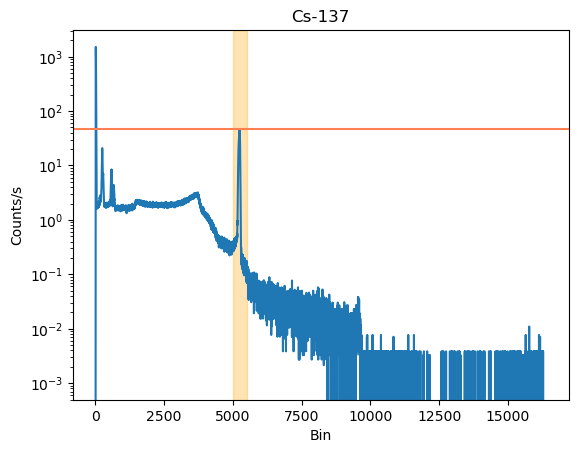

In [4]:
filepath = 'data/cs137_x10.csv'
duration = 260  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n  # counts/s

plt.plot(ch, n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Cs-137')

lower_idx = 5000
upper_idx = 5500

y = n[lower_idx:upper_idx]
amax = np.amax(y)
index = y.argmax() + lower_idx

plt.axvspan(ch[lower_idx], ch[upper_idx], color="orange", alpha=0.3)
plt.axhline(amax, color="coral")
# plt.axvline(index, color="coral")

bq_meas1 = amax
bq_exp1 = 335.6E+3  # Expected rate of Cs-137 source
br1 = 0.944  # branching ratio of gamma emission for Cs-137
energy1 = 662E+3  # Expected peak position of Cs-137 source
eff1 = bq_meas1 / (bq_exp1 * br1) * 100

print(f'Bin {index} corresponds to 662 keV')
print(f'Efficiency at {energy1} bq is {eff1*100:.2f}%')

eff_arr1 = [energy1, eff1]
corr_arr1 = [index, energy1]

# Sample 2: Ba-133
Expect peaks at 276, 302, 356, and 383 keV (and a sum peak at 436 keV)

Bins: [2198. 2403. 2826. 3044.]
Intensities: [0.59130435 1.19073713 2.92930035 0.58204148]
Energies: [276400. 302851. 356013. 383848.]
Efficiencies: [0.11275723 0.08874468 0.06449277 0.08894168]


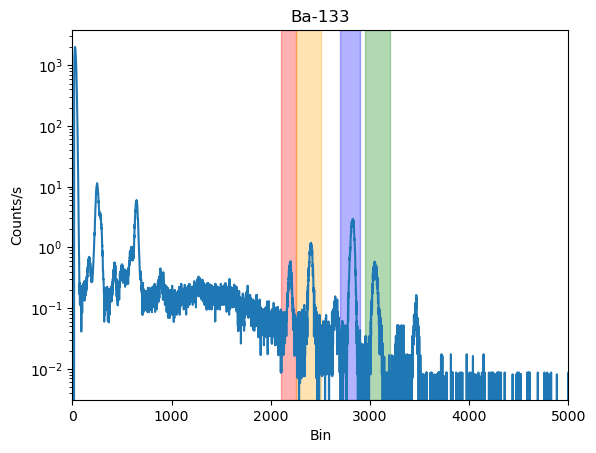

In [15]:
filepath = 'data/ba133_x10.csv'
duration = 115  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n # counts/s

plt.plot(ch, n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Ba-133')

bq_meas0 = np.array([])
indices = np.array([])

search_indices = np.array([[2100, 2250], [2250, 2500], [2700, 2900], [2950, 3200]])
for i in range(4):
    lower_idx = search_indices[i, 0]
    upper_idx = search_indices[i, 1]

    y = n[lower_idx:upper_idx]
    bq_meas0 = np.append(bq_meas0, np.amax(y))
    indices = np.append(indices, y.argmax() + lower_idx)

    
plt.axvspan(ch[search_indices[0, 0]], ch[search_indices[0, 1]], color='red', alpha=0.3)
plt.axvspan(ch[search_indices[1, 0]], ch[search_indices[1, 1]], color='orange', alpha=0.3)
plt.axvspan(ch[search_indices[2, 0]], ch[search_indices[2, 1]], color='blue', alpha=0.3)
plt.axvspan(ch[search_indices[3, 0]], ch[search_indices[3, 1]], color='green', alpha=0.3)
print(f'Bins: {indices}')
# plt.axhline(amax, color="coral")
# plt.axvline(index, color="coral")
plt.xlim(0, 5000)

print(f'Intensities: {bq_meas0}')

bq_exp0 = 7.32E+3  # Expected rate of Ba-133 source [bq]
br0 = np.array([0.07164, 0.1833, 0.6205, 0.0894, ])  # Expected branching ratios for the 4 Ba-133 peaks
energy0 = np.array([276.4, 302.851, 356.013, 383.848]) * 1E+3  # Expected peak positions of Ba-133 source [eV]
eff0 = bq_meas0 / (bq_exp0 * br0) * 100

print(f'Energies: {energy0}')
print(f'Efficiencies: {eff0}')

eff_arr0 = [energy0, eff0]
corr_arr0 = [indices, energy0]

# Sample 3: Am-241
Peak expected at 59 keV

Bin 475 corresponds to 59000.0 keV
Efficiency at 59000.0 bq is 0.006%


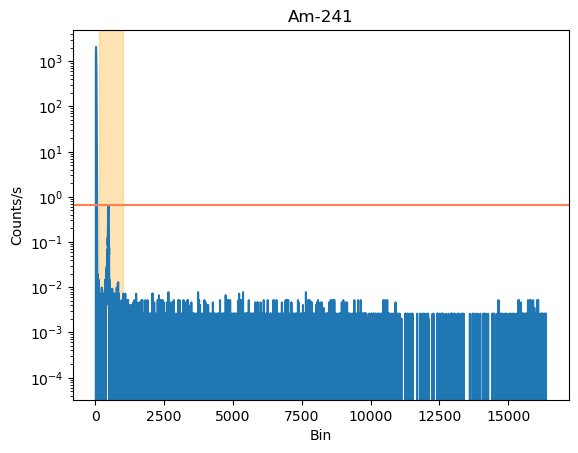

In [7]:
filepath = 'data/am241_x10.csv'
duration = 386  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n # counts/s

plt.plot(ch, n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Am-241')

lower_idx = 150
upper_idx = 1000

y = n[lower_idx:upper_idx]
amax = np.amax(y)
index = y.argmax() + lower_idx

plt.axvspan(ch[lower_idx], ch[upper_idx], color="orange", alpha=0.3)
plt.axhline(amax, color="coral")
# plt.axvline(index, color="coral")

bq_meas2 = amax
bq_exp2 = 31.89E+3  # Expected disintegration rate of Am-241 source
br2 = 0.359  # Expected branching ratio for 59 keV peak of Am-241
energy2 = 59E+3  # Expected peak position of Am-241 source
eff2 = bq_meas2 / (bq_exp2 * br2) * 100

print(f'Bin {index} corresponds to {energy2} keV')
print(f'Efficiency at {energy2} bq is {eff2:.3f}%')

eff_arr2 = [energy2, eff2]
corr_arr2 = [index, energy2]

# Background data (March 21)

In [8]:
filepath = 'data/background_2.csv'
duration = 1059  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

bg_ch = df['ch']  # bin
bg_n2 = df['n'] / duration  # counts/s

# Sample 4: Na-22
Peaks expected at 511 keV and 1274 keV

Bin 4047 corresponds to 511000.0 keV
Bin 8622 corresponds to 1274000.0 keV
Efficiency at 511000.0 bq is 0.043%
Efficiency at 1274000.0 bq is 0.010%


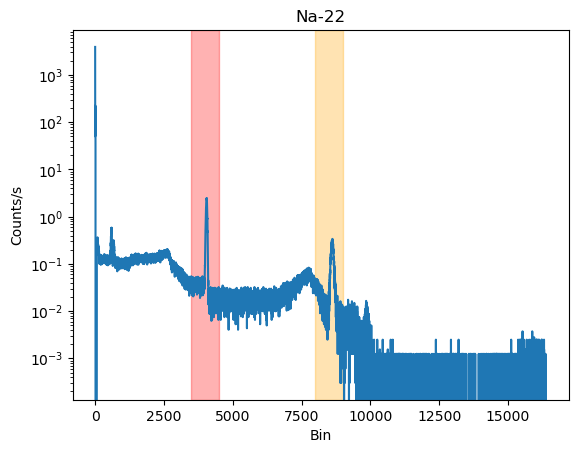

In [10]:
filepath = 'data/na22_x10.csv'
duration = 802  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n2 # counts/s

plt.plot(ch, n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Na-22')

lower_idx = 3500
upper_idx = 4500
plt.axvspan(ch[lower_idx], ch[upper_idx], color="red", alpha=0.3)

y = n[lower_idx:upper_idx]
amax1 = np.amax(y)
index1 = y.argmax() + lower_idx

lower_idx = 8000
upper_idx = 9000
plt.axvspan(ch[lower_idx], ch[upper_idx], color="orange", alpha=0.3)

y = n[lower_idx:upper_idx]
amax2 = np.amax(y)
index2 = y.argmax() + lower_idx

# plt.axhline(amax, color="coral")
# plt.axvline(index, color="coral")

bq_meas3 = np.array([amax1, amax2])
bq_exp3 = 3.24E+3  # Expected rate of Co-60 source
br3 = np.array([1.78, 0.9994])  # Expected branching ratios for the 2 Na-22 peaks
energy3 = np.array([511E+3, 1274E+3])  # Expected peak positions of Co-60 source
eff3 = bq_meas3 / (bq_exp3 * br3) * 100

print(f'Bin {index1} corresponds to {energy3[0]} keV')
print(f'Bin {index2} corresponds to {energy3[1]} keV')
print(f'Efficiency at {energy3[0]} bq is {eff3[0]:.3f}%')
print(f'Efficiency at {energy3[1]} bq is {eff3[1]:.3f}%')

eff_arr3 = [energy3, eff3]
corr_arr3 = [[index1, index2], energy3]

# Sample 5: Co-60
Peaks expected at 1173.2 keV and 1332.5 keV

Bin 8287 corresponds to 1173200.0 keV
Bin 8789 corresponds to 1332500.0 keV
Efficiency at 1173200.0 bq is 0.007%
Efficiency at 1332500.0 bq is 0.005%


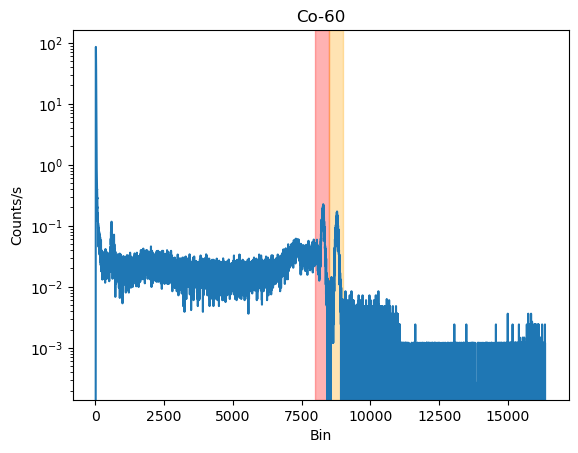

In [11]:
filepath = 'data/co60_x10.csv'
duration = 826  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n2 # counts/s

plt.plot(ch, n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Co-60')

lower_idx = 8000
upper_idx = 8500
plt.axvspan(ch[lower_idx], ch[upper_idx], color="red", alpha=0.3)

y = n[lower_idx:upper_idx]
amax1 = np.amax(y)
index1 = y.argmax() + lower_idx

lower_idx = upper_idx
upper_idx = 9000
plt.axvspan(ch[lower_idx], ch[upper_idx], color="orange", alpha=0.3)

y = n[lower_idx:upper_idx]
amax2 = np.amax(y)
index2 = y.argmax() + lower_idx

# plt.axhline(amax, color="coral")
# plt.axvline(index, color="coral")

bq_meas4 = np.array([amax1, amax2])
bq_exp4 = 3.24E+3  # Expected rate of Co-60 source
br4 = np.array([0.999736, 0.999856])  # Branching ratios for the 2 peaks of Co-60
energy4 = np.array([1173.2E+3, 1332.5E+3])  # Expected peak positions of Co-60 source
eff4 = bq_meas4 / (bq_exp4 * br4) * 100

print(f'Bin {index1} corresponds to {energy4[0]} keV')
print(f'Bin {index2} corresponds to {energy4[1]} keV')
print(f'Efficiency at {energy4[0]} bq is {eff4[0]:.3f}%')
print(f'Efficiency at {energy4[1]} bq is {eff4[1]:.3f}%')

eff_arr4 = [energy4, eff4]
corr_arr4 = [[index1, index2], energy4]

# Sample 6: Co-57
Peaks expected at 122 keV (85.60%) and 136 keV (10.68%)

Bins: [ 969. 1084.]
Intensities: [120.38953108  14.17229363]
Energies: [122060.65 136473.  ]
Efficiencies: [0.18860396 0.17795277]


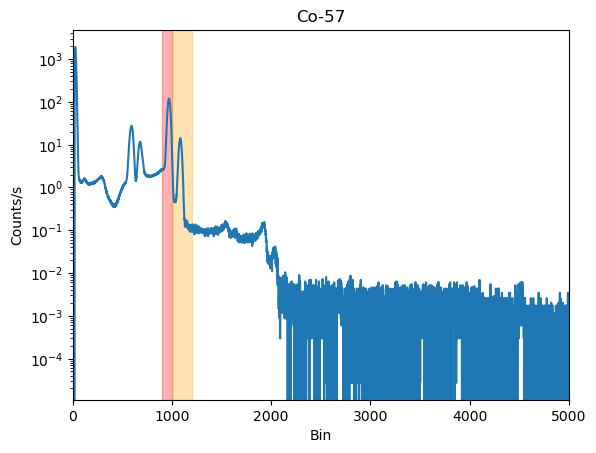

In [31]:
filepath = 'data/co57_x10.csv'
duration = 1157  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n # counts/s

plt.plot(ch, n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Co-57')

bq_meas5 = np.array([])
indices = np.array([])

search_indices = np.array([[900, 1000], [1000, 1200]])
for i in range(2):
    lower_idx = search_indices[i, 0]
    upper_idx = search_indices[i, 1]

    y = n[lower_idx:upper_idx]
    bq_meas5 = np.append(bq_meas5, np.amax(y))
    indices = np.append(indices, y.argmax() + lower_idx)
    
plt.axvspan(ch[search_indices[0, 0]], ch[search_indices[0, 1]], color='red', alpha=0.3)
plt.axvspan(ch[search_indices[1, 0]], ch[search_indices[1, 1]], color='orange', alpha=0.3)
print(f'Bins: {indices}')
# plt.axhline(amax, color="coral")
# plt.axvline(index, color="coral")
plt.xlim(0, 5000)

print(f'Intensities: {bq_meas5}')

bq_exp5 = 74.57E+3  # Expected rate of Co-57 source [bq]
br5 = np.array([0.8560, 0.1068])  # Expected branching ratios for the 4 Co-57 peaks
energy5 = np.array([122.06065, 136.473]) * 1E+3  # Expected peak positions of Co-57 source [eV]
eff5 = bq_meas5 / (bq_exp5 * br5) * 100

print(f'Energies: {energy5}')
print(f'Efficiencies: {eff5}')

eff_arr5 = [energy5, eff5]
corr_arr5 = [indices, energy5]

[  738.  1932.  3768.  7218. 11127. 12982.]
1.602176634e-19
[8.01088317e-20 2.00272079e-19 4.00544158e-19 8.01088317e-19
 2.00272079e-18 4.00544158e-18]


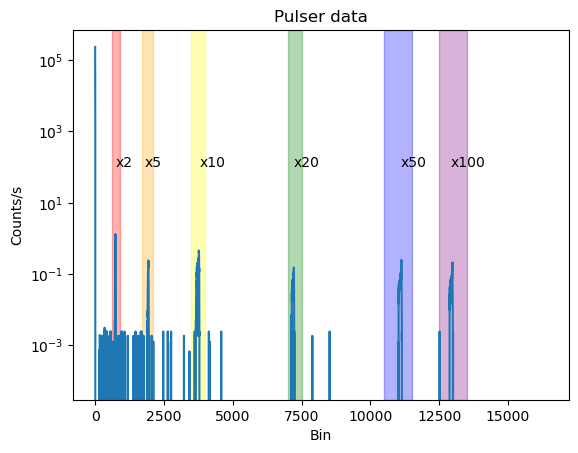

In [47]:
filepath = 'data/pulser_x10.csv'
duration = 425  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n # counts/s

plt.plot(ch, n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Pulser data')

bq_meas0 = np.array([])
pulser_i = np.array([])

settings = np.array([2, 5, 10, 20, 50, 100])
search_indices = np.array([[600, 900], [1700, 2100], [3500, 4000], [7000, 7500], [10500, 11500], [12500, 13500]])
for i in range(len(search_indices)):
    lower_idx = search_indices[i, 0]
    upper_idx = search_indices[i, 1]

    y = n[lower_idx:upper_idx]
    bq_meas0 = np.append(bq_meas0, np.amax(y))
    pulser_i = np.append(pulser_i, y.argmax() + lower_idx)
    
plt.axvspan(ch[search_indices[0, 0]], ch[search_indices[0, 1]], color='red', alpha=0.3)
plt.text(750, 100, f'x{settings[0]}')
plt.axvspan(ch[search_indices[1, 0]], ch[search_indices[1, 1]], color='orange', alpha=0.3)
plt.text(1800, 100, f'x{settings[1]}')
plt.axvspan(ch[search_indices[2, 0]], ch[search_indices[2, 1]], color='yellow', alpha=0.3)
plt.text(3800, 100, f'x{settings[2]}')
plt.axvspan(ch[search_indices[3, 0]], ch[search_indices[3, 1]], color='green', alpha=0.3)
plt.text(7200, 100, f'x{settings[3]}')
plt.axvspan(ch[search_indices[4, 0]], ch[search_indices[4, 1]], color='blue', alpha=0.3)
plt.text(11100, 100, f'x{settings[4]}')
plt.axvspan(ch[search_indices[5, 0]], ch[search_indices[5, 1]], color='purple', alpha=0.3)
plt.text(12900, 100, f'x{settings[5]}')

print(pulser_i)
print(const.e)
e0 = 500E-3  *const.e / 2  # Original pulse with x2 setting read 500 mV
energies = e0 * settings
print(energies)

## Calibration plots

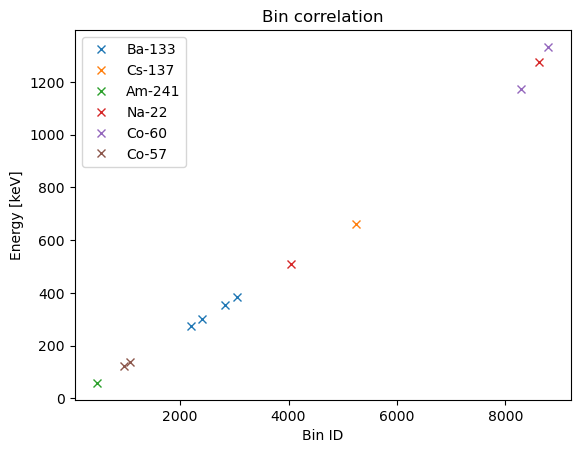

In [50]:
plt.plot(corr_arr0[0], corr_arr0[1] / 1000, 'x', label='Ba-133')
plt.plot(corr_arr1[0], corr_arr1[1] / 1000, 'x', label='Cs-137')
plt.plot(corr_arr2[0], corr_arr2[1] / 1000, 'x', label='Am-241')
plt.plot(corr_arr3[0], corr_arr3[1] / 1000, 'x', label='Na-22')
plt.plot(corr_arr4[0], corr_arr4[1] / 1000, 'x', label='Co-60')
plt.plot(corr_arr5[0], corr_arr5[1] / 1000, 'x', label='Co-57')
#plt.plot(pulser_i, energies / 1000, 'x', label='Pulser')
plt.xlabel('Bin ID')
plt.ylabel('Energy [keV]')
plt.title('Bin correlation')
plt.legend()
plt.show()

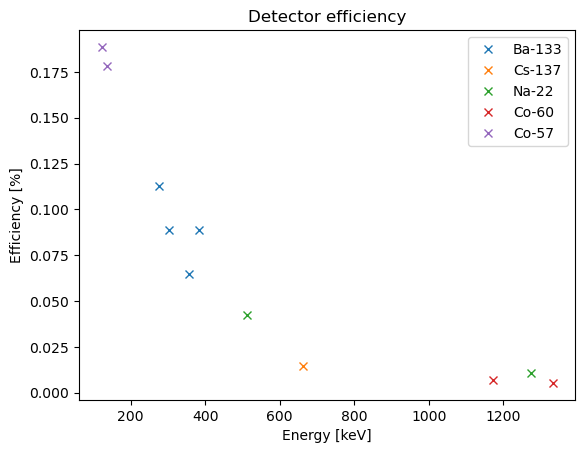

In [49]:
plt.plot(eff_arr0[0] / 1000, eff_arr0[1], 'x', label='Ba-133')
plt.plot(eff_arr1[0] / 1000, eff_arr1[1], 'x', label='Cs-137')
# plt.plot(eff_arr2[0] / 1000, eff_arr2[1], 'x', label='Am-241')
plt.plot(eff_arr3[0] / 1000, eff_arr3[1], 'x', label='Na-22')
plt.plot(eff_arr4[0] / 1000, eff_arr4[1], 'x', label='Co-60')
plt.plot(eff_arr5[0] / 1000, eff_arr5[1], 'x', label='Co-57')
plt.xlabel('Energy [keV]')
plt.ylabel('Efficiency [%]')
plt.title('Detector efficiency')
plt.legend()
plt.show()